# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

#Data Visulaziation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The Dataset contains 7043 Rows and 21 Columns.

# Displaying all columns

In [3]:
pd.set_option("display.max_columns",None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Here we can see all the columns present in the dataset.
Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem" where we need to predict the several churn using the classification models.

# Exploratory Data Analysis(EDA)

In [4]:
# Checking the shape
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns.

In [5]:
# Checking the columns of dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# For getting  columns name in list
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

'Churn' is the target variable and remaining 20 are independent variables.

In [7]:
# Checking the column types.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The dataset consist of 'object', 'int64' & 'float' data.

In [8]:
#Checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the Dataset.

<AxesSubplot:>

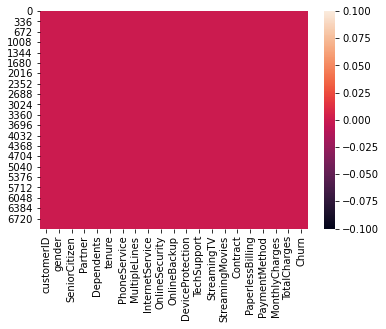

In [9]:
#Lets visualize the null values using heatmap
sns.heatmap(df.isnull())

There se no white spaces present in map, it means the dataset is free from null values.

In [10]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This gives the complete information about dataset i.e. columns, null counts and datatype. The dataset contaions 7043 rows and we can see that all the columns have 7043 entries, so we can easily observe that no null values is present in the dataset.

In [11]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n -----------------------------------------------------------")

8023-QHAIO    1
5924-IFQTT    1
5940-NFXKV    1
6211-WWLTF    1
5960-WPXQM    1
             ..
3858-XHYJO    1
9402-ROUMJ    1
2333-KWEWW    1
5419-CONWX    1
2650-GYRYL    1
Name: customerID, Length: 7043, dtype: int64

 -----------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64

 -----------------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 -----------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64

 -----------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64

 -----------------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

 -----------------------------------------------------------
Yes    6361
No      682
Name: PhoneServi

This shows the value conts of each columns and gives the idea about the unique values.
As we can see that "TotalCharges" contain blank data.
So we can treat this values after checking for unique values. 

In [12]:
# Checking the unique values present in TotalCharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After locating 'TotalCharges' column, we can see the position of the 'Space' present in dataset.

In [14]:
# Let's replace this blank spaces
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [15]:
# Again checking the value count of the 'TotalCharges' after replacing the blank spaces.
df["TotalCharges"].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
1742.5      1
196.15      1
2907.55     1
370.65      1
1064.95     1
Name: TotalCharges, Length: 6530, dtype: int64

As we can see that the blank spaces is successfully replaced.

As we can see that 'TotalCharges' contains float values but we are getting its datatype as Object. so we need to convert it to float datatypes.

In [16]:
# Converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

We have converted the datatype of "TotalCharges" from object to float

In [17]:
# Lets check null values again
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It's shows 11 Null values in TotalCharges column after replacing blank spaces with NaN.

Replacing the NAN values using mean method as the data has continuous values.

In [18]:
# Checkin the mean of TotalCharges column
print("The mean value of TotalCharges is:",df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


In [19]:
# Filling null values in TotalCharges with its mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

<AxesSubplot:>

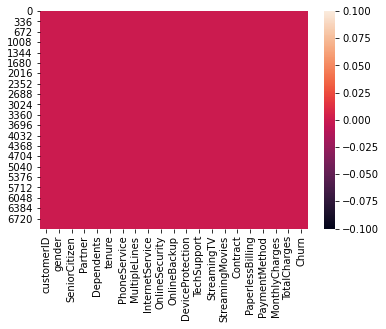

In [20]:
# Lets check the null values again
sns.heatmap(df.isnull())

Now we can see there are no missing values in any of the column.

In [21]:
#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']




In [22]:
#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [23]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


CoustomerId for each coustomer is unique.It will not effect the target data so, we can drop this column.

In [24]:
# Dropping CustomerID column
df.drop("customerID",axis=1,inplace=True)

In [25]:
# Again checking the dataset after dropping the CoustomerId column
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


As we see the 'CustomerId' column has been droped.

In [26]:
# Checking the list of counts of target
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

Only two categories is present in target column i.e. 'Yes & No'

In [27]:
# Checking the unique values in target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

"No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

# Description of Dataset

In [28]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The summary of the dataset looks perfect since there is no negative/incvalid values present.

Observations:

    The counts of all the columns are same which means there are no missing values in the dataset.
    
    The mean value is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these column.
    
    The data in the column MonthlyCharges have mean value less than median which means the data is skewed to left.
    
    By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.
    

# Data Visualization

# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


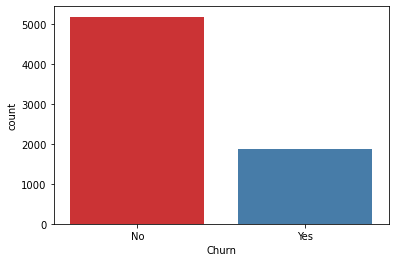

In [29]:
# Visualize the number of Churned customers
print(df['Churn'].value_counts())
sns.countplot(df['Churn'],palette="Set1")
plt.show()

There are more number of customers who have not churned than churned coustomer.

This leads to class imbalance issue in the data. we will rectify it by using oversampling method in later part.

Male      3555
Female    3488
Name: gender, dtype: int64


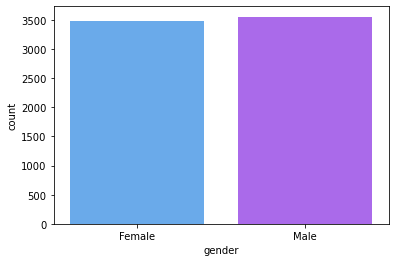

In [30]:
#Visualizing the count of Gender
print(df['gender'].value_counts())
sns.countplot(df['gender'],palette='cool')
plt.show()

we can observe that the total number of males and females are almost same.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


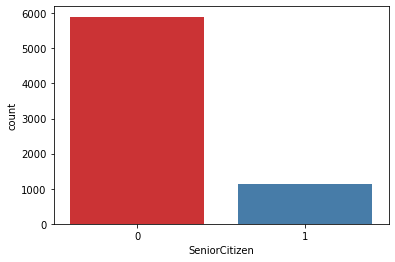

In [31]:
#Visualizing the count of SeniorCitizen
print(df['SeniorCitizen'].value_counts())
sns.countplot(df['SeniorCitizen'],palette='Set1')
plt.show()

Number of senior citizen coustomers are 1142 while non senior citizen coustomers are 5901.

No     3641
Yes    3402
Name: Partner, dtype: int64


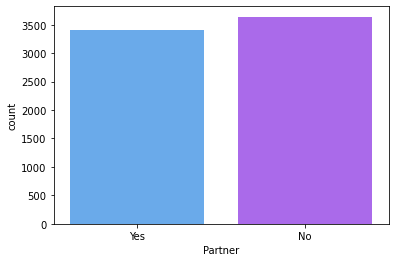

In [32]:
#Visualizing the count of Partner
print(df['Partner'].value_counts())
sns.countplot(df['Partner'],palette='cool')
plt.show()

Coustomers having partners are 3402 while coustomers having no partners are 3641.

No     4933
Yes    2110
Name: Dependents, dtype: int64


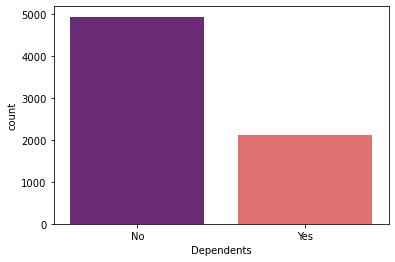

In [33]:
#Visualizing the count of Dependents
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'],palette='magma')
plt.show()

There are 2110 customers having dependents whereas 4933 coustomers not having dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


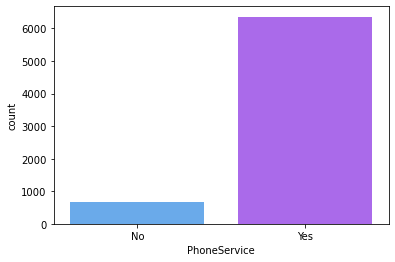

In [34]:
#Visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
sns.countplot(df['PhoneService'],palette='cool')
plt.show()

There are 6361 customers having phone services whereas coustomers who do not have phone services are only 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


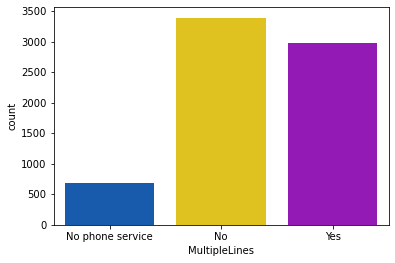

In [35]:
#Visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
sns.countplot(df['MultipleLines'],palette='prism')
plt.show()

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


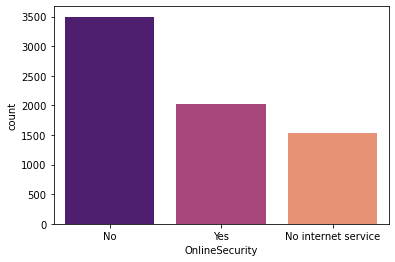

In [36]:
#Visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
sns.countplot(df['OnlineSecurity'],palette='magma')
plt.show()

There are 3498 customers who do not have any online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


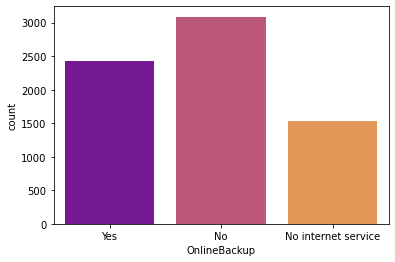

In [37]:
#Visualizing how many customers of OnlineBackup
print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'],palette='plasma')
plt.show()

We can observe that the customers having no internet services have very less online backup counts compared to others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


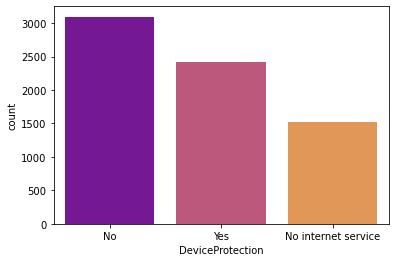

In [38]:
# Visualizing how many customers of DeviceProtection
print(df['DeviceProtection'].value_counts())
sns.countplot(df['DeviceProtection'],palette='plasma')
plt.show()


We can see that the customers who do not have internet service, they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


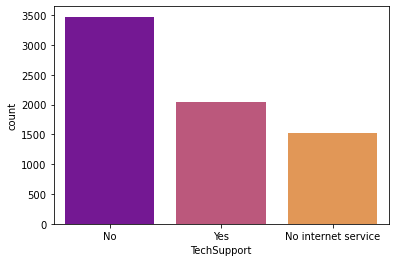

In [39]:
# Visualizing how many customers of TechSupport
print(df['TechSupport'].value_counts())
sns.countplot(df['TechSupport'],palette='plasma')
plt.show()

There are 3473 coustomers who don't need any techsupport.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


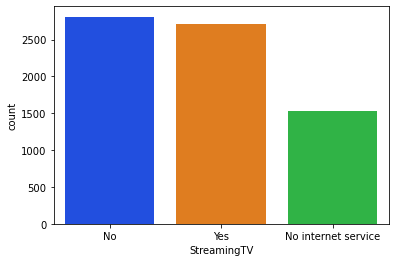

In [40]:
#Visualizing how many customers have StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")
plt.show()

There are 2810 coustomers who do not use StreamingTV.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


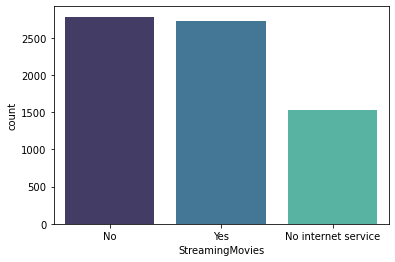

In [41]:
#Visualizing how many customers have StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="mako")
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


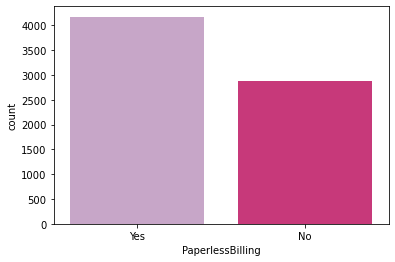

In [42]:
#Visualizing how many customers have PaymentMethod
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="PuRd")
plt.show()

4171 customers prefer paperless billing and 2872 customers do not prefer paperless billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


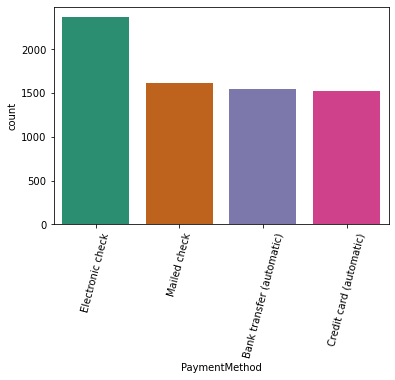

In [43]:
#Visualizing the count of PaymentMethod
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

The customers who prefer Electronic check payment method are very high in numbers whereas average number of customers prefer Mailed Check, bank transfer and Credit card payment method.

# Plotting numerical columns

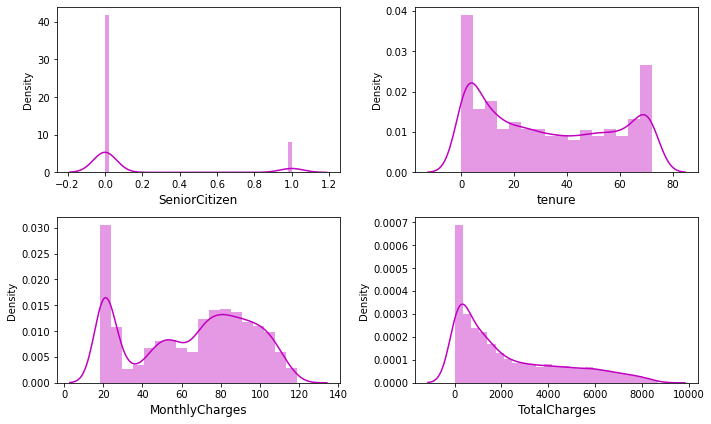

In [44]:
# Let's check how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The two columns tenure and MonthlyCharges do not have skewness.

TotalCharges is skewed to the right.

The data almost looks normal in all the columns except SeniorCitizen.

# Bivariate Analysis

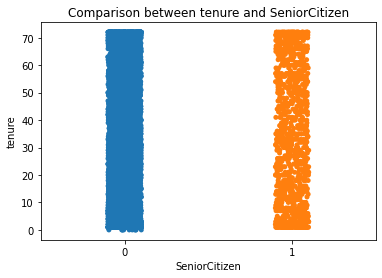

In [45]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

Here, the person who is senior citizen and the person who is not senior citizer are having almost equal tenure.

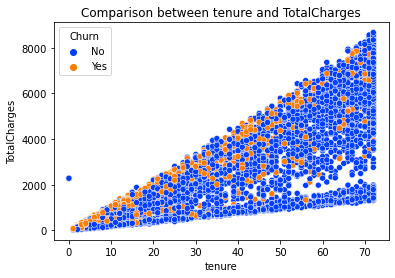

In [46]:
# Comparing tenure and TotalCharges
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x = 'tenure',y = 'TotalCharges',data = df,hue='Churn',palette='bright')
plt.show()


Here we can notice the strong linear relation between the features.

As the tenure increses, TotalCharges also increases rapidly. If the customers have low tenure services than there is high chance of churn.

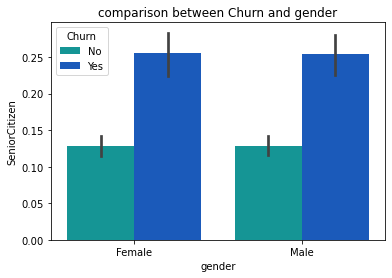

In [47]:
# Comparing gender and SeniorCitizen on the basis of Churn
plt.title("comparison between Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=df,palette='winter_r',hue='Churn')
plt.show()

There is no difference between the Male and Female senior citizen.

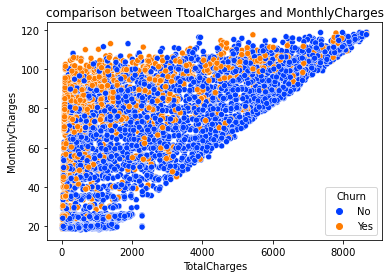

In [48]:
# Comapring TotalCharges and MonthlyCharges
plt.title("comparison between TtoalCharges and MonthlyCharges")
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette="bright")
plt.show()

There is a linear relationship between the MonthlyCharges & TotalCharges. The customer with high monthly charges have high tendency to stop the services since they have high total charges.

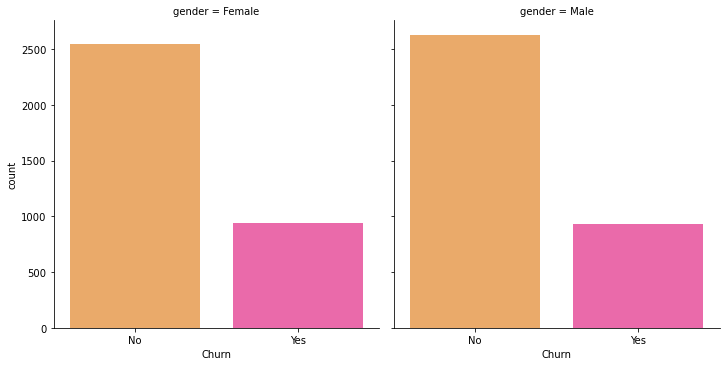

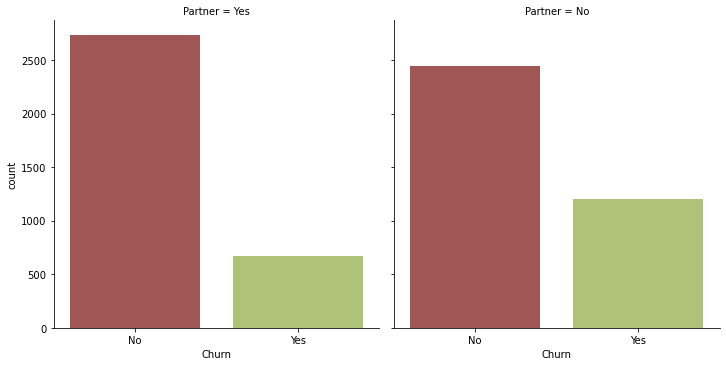

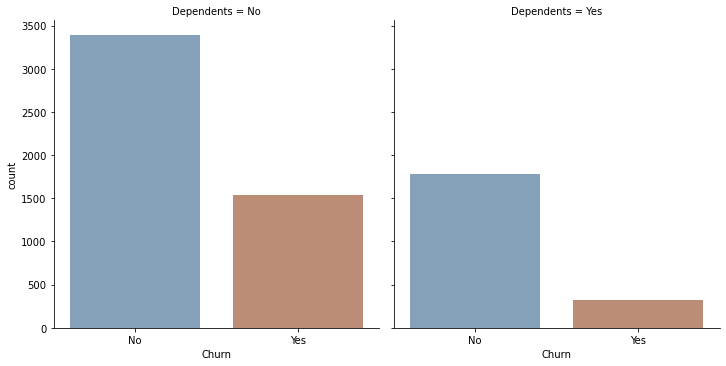

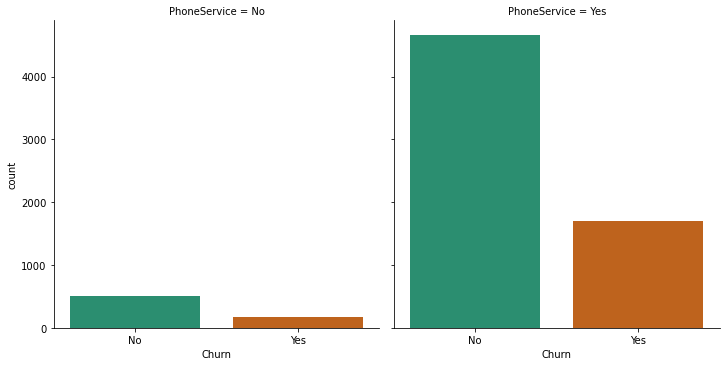

In [49]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette='tab20b_r',kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette='twilight_shifted',kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()


In the first plot we can see that Male and Female both have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

In the third plot the customers who do not have any dependents have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned.

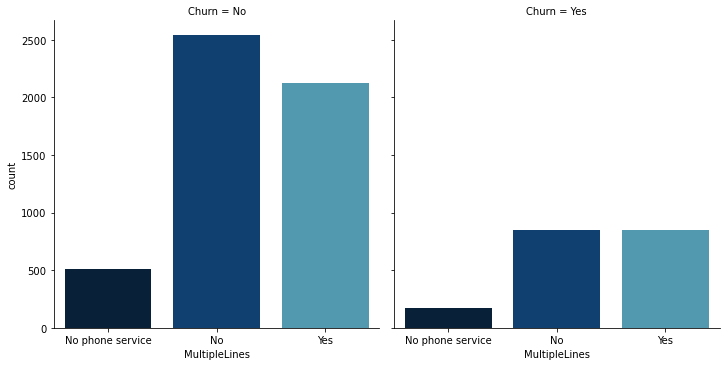

In [50]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

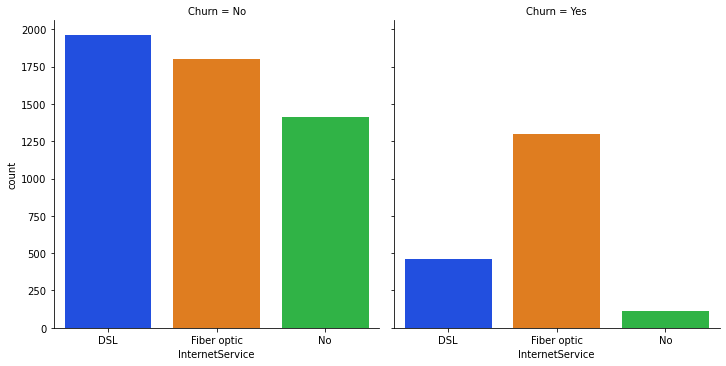

In [51]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

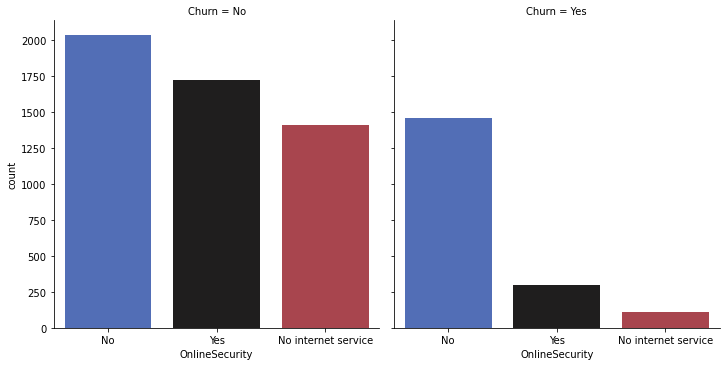

In [52]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

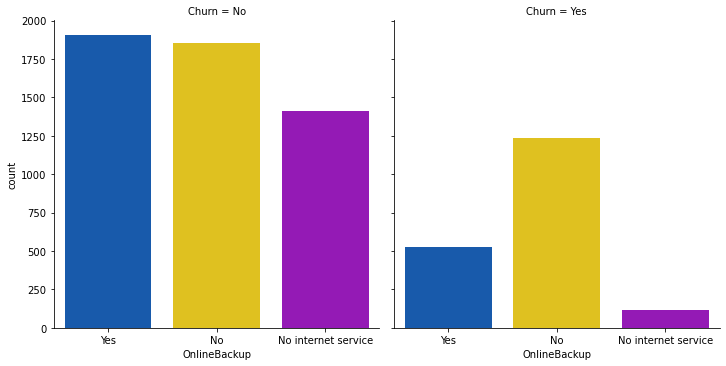

In [53]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="prism",kind="count",data=df)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

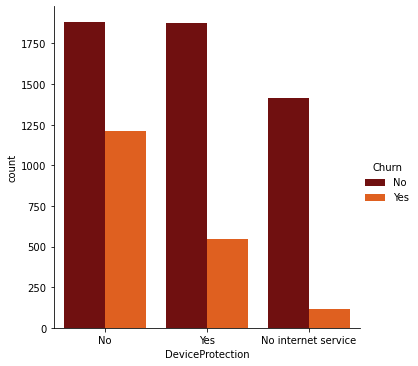

In [54]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

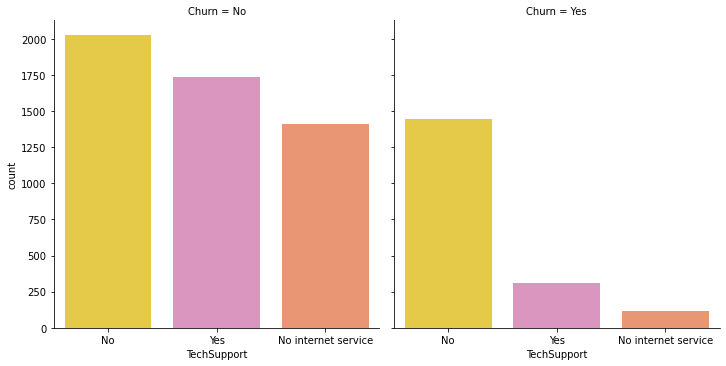

In [55]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="Set2_r",kind="count",data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio

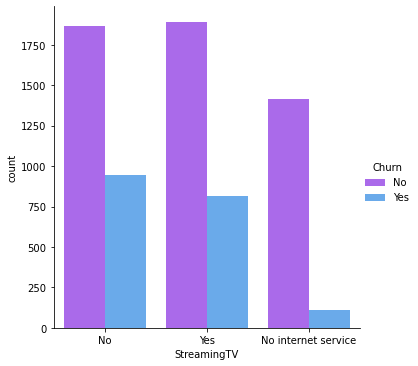

In [56]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

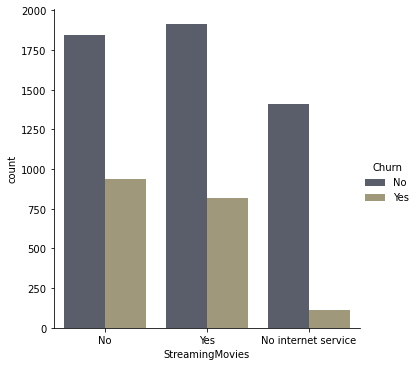

In [57]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="cividis",kind="count",data=df)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

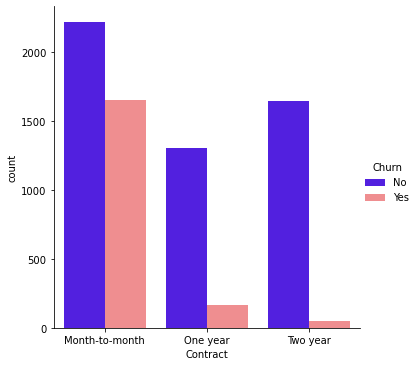

In [58]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

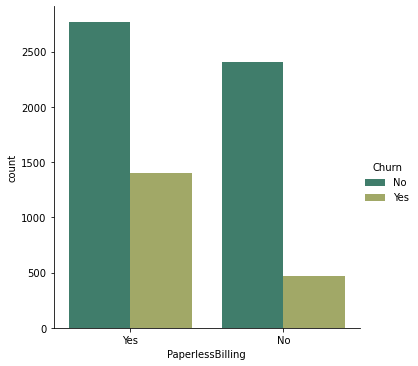

In [59]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="gist_earth",kind="count",data=df)
plt.show()


The customers who prefer paperless billing they have high churn rate.

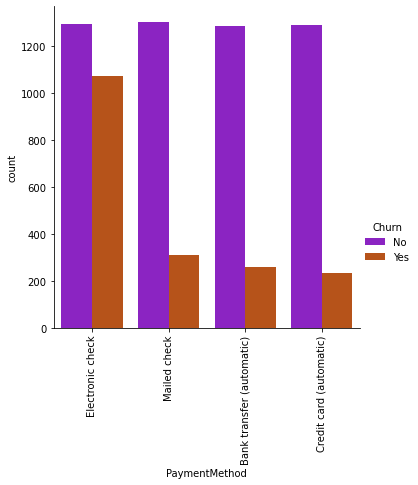

In [60]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

# Multivariate Analysis

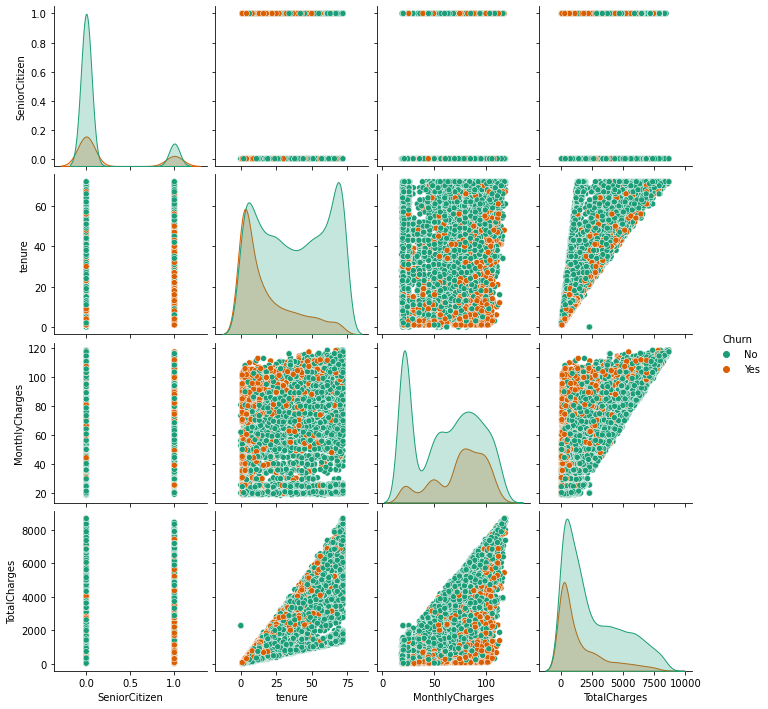

In [61]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

# Checking for Outliers

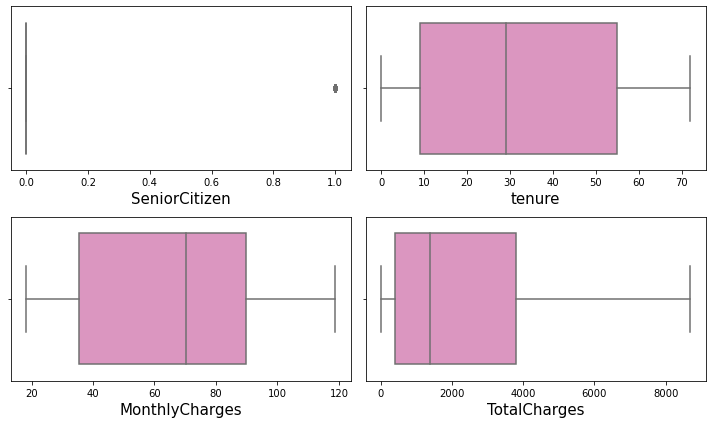

In [62]:
# Lets check the outliers by plotting boxplot.

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

# Checking for skewness

In [63]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

# Removing skewness

In [64]:
# Removing skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

We have removed the skewness using cube root method.

In [65]:
# checking skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

We can see the skewness has been reduced in TotalCharges column.

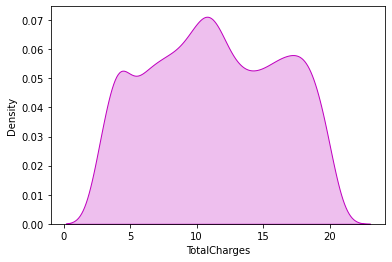

In [66]:
# Lets visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df['TotalCharges'],color="m",kde_kws={"shade":True},hist=False)
plt.show()

This looks almost normal and skewness is also removed.

# Encoding categorical columns

In [67]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


We have converted the categorical columns into numerical columns using Ordinal Encoding method.

In [68]:
# Statistical summary of numerical 
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns we can see all column details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count, mean, std, min,IQR and max values of all the columns.

# Correlation between target variable and independent variables using heatmap

In [69]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap.

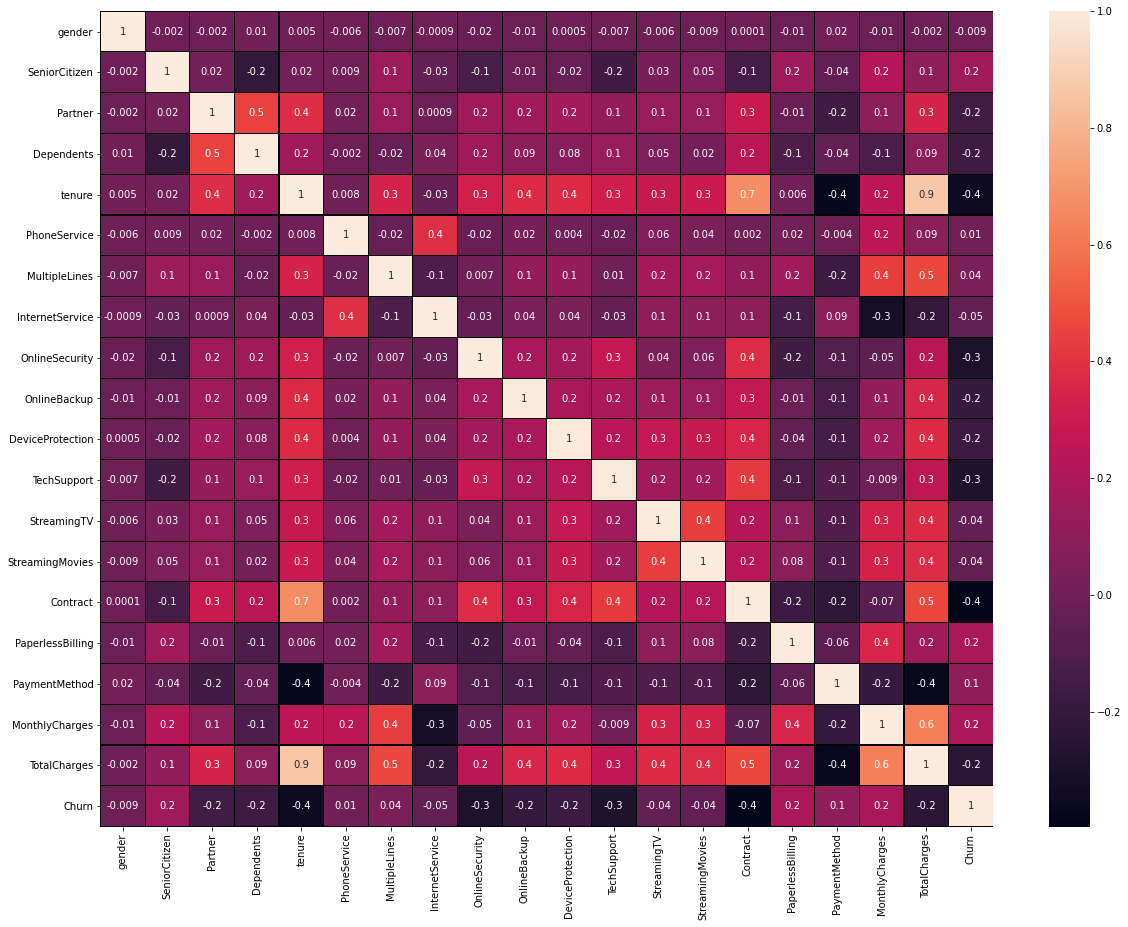

In [110]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation

There is no much positive correlation between the target and features.

The column MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the Label Column "Churn".

The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very correlation with the label, we can drop it if necessary.

The column TotalCharges and tenure, Contract and tenure, TotalCharge and MonthlyCharges and many other columns have high correlation with each other.

In [71]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target

# Visualizing the correlation between label and features using bar plot

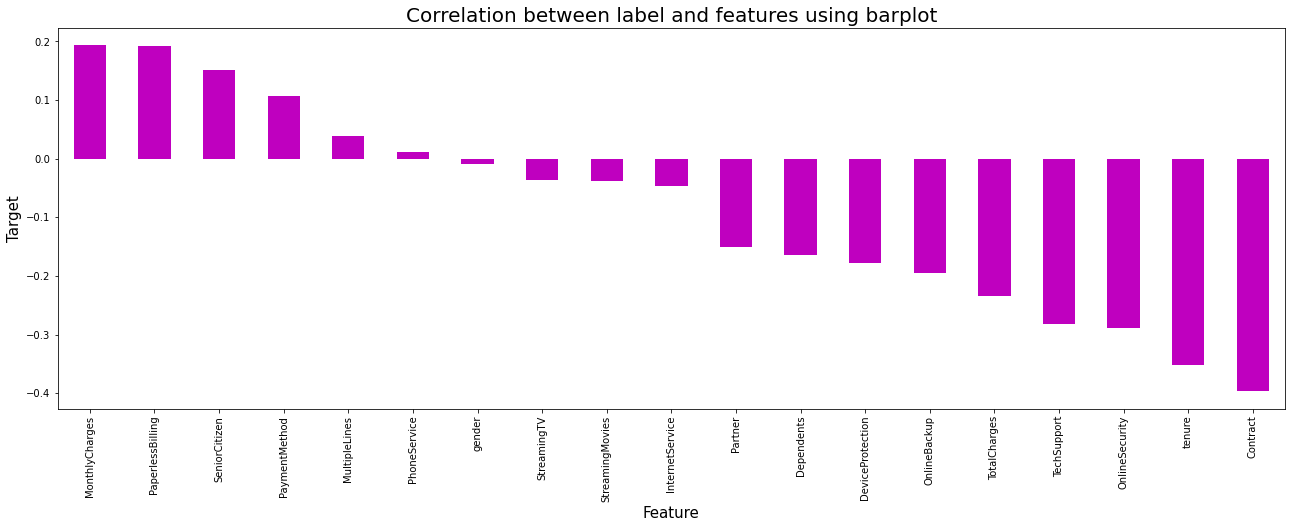

In [72]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

# Separating features and label

In [73]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [74]:
x.shape

(7043, 19)

In [75]:
y.shape

(7043,)

# Feature Scaling using Standard Scalarization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

# Checking Variance Inflation Factor(VIF)

In [77]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF values we can find the features causing multicolineraity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [78]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [79]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved multicolinearity issue.We can now move ahead for model building.

In [80]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can observe that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

# Oversampling

In [81]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [82]:
# Checking value count of target column
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Now the data is balanced. Now we can build machine learning classification models.



# Modeling

# Finding the best random state

In [83]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.8640901771336554 at random_state 143


# Creating train test split

In [84]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [85]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [86]:
# Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8615136876006442
[[1307  231]
 [ 199 1368]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1538
         1.0       0.86      0.87      0.86      1567

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy for this model is 86.15%.

# Logistic Regression

In [87]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7745571658615137
[[1145  393]
 [ 307 1260]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77      1538
         1.0       0.76      0.80      0.78      1567

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105



The accuracy score using LogisticRegression is 77.45%

# Support Vector Machine Classifier

In [88]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8106280193236715
[[1180  358]
 [ 230 1337]]
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80      1538
         1.0       0.79      0.85      0.82      1567

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



The accuracy score using Support Vector Machine Classifier is 81.06%.

# Gradient Boosting Classifier

In [89]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8466988727858293
[[1264  274]
 [ 202 1365]]
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1538
         1.0       0.83      0.87      0.85      1567

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



The accuracy_score using Gradient Boosting Classifier is 84.66%.



# AdaBoost Classifier

In [90]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8289855072463768
[[1230  308]
 [ 223 1344]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1538
         1.0       0.81      0.86      0.84      1567

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy_score using AdaBoostClassifier is 82.89%.

# BaggingClassifier

In [91]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.842512077294686
[[1328  210]
 [ 279 1288]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      1538
         1.0       0.86      0.82      0.84      1567

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



The accuracy_score using BaggingClassifier is 84.25%.

# ExtraTreesClassifier

In [92]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8628019323671497
[[1318  220]
 [ 206 1361]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1538
         1.0       0.86      0.87      0.86      1567

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy_score using ExtraTreesClassifier is 86.28%.

# Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())


[0.76425121 0.78599034 0.89371981 0.89946834 0.9120348 ]
0.8510928988542622
Difference between Accuracy score and cross validation score is -  0.01042078874638197


In [95]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.76811594 0.75603865 0.7705314  0.7858869  0.79023683]
0.7741619443218619
Difference between Accuracy score and cross validation score is -  0.00039522153965176887


In [96]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

[0.77874396 0.77004831 0.81884058 0.82551957 0.83711938]
0.8060543612517892
Difference between Accuracy score and cross validation score is -  0.004573658071882258


In [97]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

[0.74541063 0.77922705 0.87246377 0.87965201 0.88255196]
0.8318610825085283
Difference between Accuracy score and cross validation score is -  0.014837790277301033


In [98]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

[0.7589372  0.77391304 0.83478261 0.85161914 0.84968584]
0.8137875656983817
Difference between Accuracy score and cross validation score is -  0.01519794154799503


In [99]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

[0.73043478 0.76328502 0.8647343  0.88255196 0.89270179]
0.8267415704102193
Difference between Accuracy score and cross validation score is -  0.015770506884466684


In [100]:
# Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

[0.80531401 0.80676329 0.89661836 0.90043499 0.91541808]
0.8649097442578857
Difference between Accuracy score and cross validation score is -  -0.0021078118907359444


# Hyper Parameter Tuning

In [101]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [102]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [104]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [105]:
Final_model = ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=100,n_jobs=-2,random_state=10)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.44122383252818


The accuracy of best model is increased after tuning and its 86.44% which is very good.

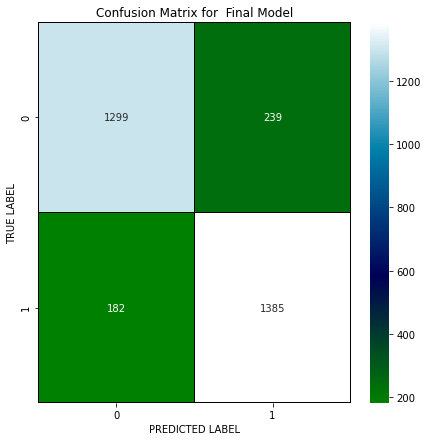

In [106]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC and compare AUC for all the models used

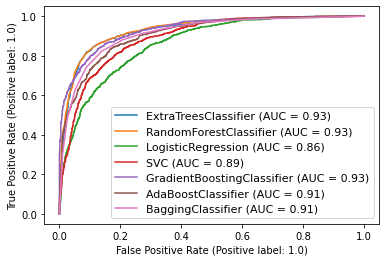

In [108]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(ET,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see area under curve for each model used.



# Plotting ROC and compare AUC for the best model

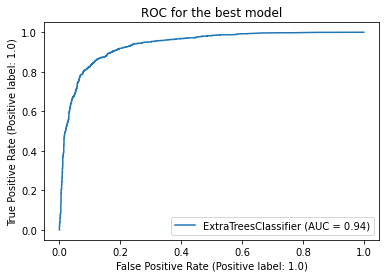

In [109]:
# Let's check the AUC for the best model after hyper parameter tuning
plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

# Saving the model

In [111]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

# Predicting the saved model

In [112]:
# Lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 1., ..., 0., 0., 0.])

In [113]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,1.0,1.0
3101,0.0,0.0
3102,0.0,0.0
3103,0.0,0.0
